# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _for Pythonistas_

> TL;DR: _Julia looks and feels a lot like Python, only much faster. It's dynamic, expressive, extensible, with batteries included, in particular for Data Science_.

This notebook is an **introduction to Julia for Python programmers**.

It will go through the most important Python features (such as functions, basic types, list comprehensions, exceptions, generators, modules, packages, and so on) and show you how to code them in Julia.

# Getting Started with Julia in Colab/Jupyter
You can either run this notebook in Google Colab, or using Jupyter on your own machine.

## Running on Google Colab
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia (the Jupyter kernel for Julia) and other packages. You can update `JULIA_VERSION` and the other parameters, if you know what you're doing. Installation takes 2-3 minutes.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the _Checking the Installation_ section.

* _Note_: If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.5.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2020-07-02 00:00:58 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed VersionParsing ── v1.2.0
  Installed MbedTLS_jll ───── v2.16.6+0
  Installed SoftGlobalScope ─ v1.0.10
  Installed ZeroMQ_jll ────── v4.3.2+4
  Installed Parsers ───────── v1.0.6
  Installed Conda ─────────── v1.4.1
  Installed JSON ──────────── v0.21.0
  Installed IJulia ────────── v1.21.2
  Installed ZMQ ───────────── v1.2.1
  Installed MbedTLS ───────── v1.0.2
######################################################################## 100.0%
#######################################################################

## Running This Notebook Locally
If you prefer to run this notebook on your machine instead of Google Colab:

* Download this notebook (File > Download .ipynb)
* Install [Julia](https://julialang.org/downloads/)
* Run the following command in a terminal to install `IJulia` (the Jupyter kernel for Julia), and a few packages we will use:
```bash
julia -e 'using Pkg
            pkg"add IJulia; precompile;"
            pkg"add BenchmarkTools; precompile;"
            pkg"add PyCall; precompile;"
            pkg"add PyPlot; precompile;"'
```

* Next, go to the directory containing this notebook:

    ```julia
cd /path/to/notebook/directory
```

* Start Jupyter Notebook:

    ```bash
julia -e 'using IJulia; IJulia.notebook()'
```

    Or replace `notebook()` with `jupyterlab()` if you prefer JupyterLab.

    If you do not already have [Jupyter](https://jupyter.org/install) installed, IJulia will propose to install it. If you agree, it will automatically install a private Miniconda (just for Julia), and install Jupyter and Python inside it.

* Lastly, open this notebook and skip directly to the next section.

## Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system (if you ever ask for help or file an issue about Julia, you should always provide this information).

In [1]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 4


# Getting Help
To get help on any module, function, variable, or just about anything else, just type `?` followed by what you're interested in. For example:

In [2]:
?versioninfo

search: versioninfo



```
versioninfo(io::IO=stdout; verbose::Bool=false)
```

Print information about the version of Julia in use. The output is controlled with boolean keyword arguments:

  * `verbose`: print all additional information


This works in interactive mode only: in Jupyter, Colab and in the Julia shell (called the REPL).

Here are a few more ways to get help and inspect objects in interactive mode:

|Julia|Python
|-----|------
|`?obj` | `help(obj)`
|`dump(obj)` | `print(repr(obj))`
|`names(FooModule)` | `dir(foo_module)`
|`methodswith(SomeType)` | `dir(SomeType)`
|`@which func` | `func.__module__`
|`apropos("bar")` | Search for `"bar"` in docstrings of all installed packages
|`typeof(obj)` | `type(obj)`
|`obj isa SomeType`<br />or<br />`isa(obj, SomeType)` | `isinstance(obj, SomeType)`

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

And of course, you can also learn and get help here:

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

# A First Look at Julia
This section will give you an idea of what Julia looks like and what some of its major qualities are: it's expressive, dynamic, flexible, and most of all, super fast.

## Estimating π
Let's write our first function. It will estimate π using the equation:
$π = 4 \times \left(1 - \dfrac{1}{3} + \dfrac{1}{5} - \dfrac{1}{7} + \dfrac{1}{9}-\dfrac{1}{11}+\dots\right)$

There are much better ways to estimate π, but this one is easy to implement.

In [3]:
function estimate_pi(n)
    s = 1.0
    for i in 1:n
        s += (isodd(i) ? -1 : 1) / (2i + 1)
    end
    4s
end

p = estimate_pi(100_000_000)
println("π ≈ $p")
println("Error is $(p - π)")

π ≈ 3.141592663589326
Error is 9.999532757376528e-9


**Note**: syntax highlighting for Julia does not work (yet?) on Colab, but it does in Jupyter.

Compare this with the equivalent Python 3 code:

```python
# PYTHON
import math

def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s

p = estimate_pi(100_000_000)
print(f"π ≈ {p}") # f-strings are available in Python 3.6+
print(f"Error is {p - math.pi}")
```

Pretty similar, right? But notice the small differences:

|Julia|Python
|-----|------
|`function` | `def`
|`for i in X`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end` | `for i in X:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`1:n` | `range(1, n+1)`
|`cond ? a : b` | `a if cond else b`
|`2i + 1` | `2 * i + 1`
|`4s` | `return 4 * s`
|`println(a, b)` | `print(a, b, sep="")`
|`print(a, b)` | `print(a, b, sep="", end="")`
|`"$p"` | `f"{p}"`
|`"$(p - π)"` | `f"{p - math.pi}"`

This example shows that:
* Julia can be just as concise and readable as Python.
* Indentation in Julia is _not_ meaningful like it is in Python. Instead, blocks end with `end`.
* Many math features are built in Julia and need no imports.
* There's some mathy syntactic sugar, such as `2i` (but you can write `2 * i` if you prefer).
* In Julia, the `return` keyword is optional at the end of a function. The result of the last expression is returned (`4s` in this example).
* Julia loves Unicode and does not hesitate to use Unicode characters like `π`. However, there are generally plain-ASCII equivalents (e.g., `π == pi`).

## Typing Unicode Characters

Typing Unicode characters is easy: for latex symbols like π, just type `\pi<tab>`. For emojis like 😃, type `\:smiley:<tab>`.

This works in the REPL, in Jupyter, but unfortunately not in Colab (yet?). As a workaround, you can run the following code to print the character you want, then copy/paste it:

In [4]:
using REPL.REPLCompletions: latex_symbols, emoji_symbols

latex_symbols["\\pi"]

"π"

In [5]:
emoji_symbols["\\:smiley:"]

"😃"

In Julia, `using Foo.Bar: a, b` corresponds to running `from foo.bar import a, b` in Python.

|Julia|Python
|-----|------
|`using Foo` | `from foo import *; import foo`
|`using Foo.Bar` | `from foo.bar import *; from foo import bar`
|`using Foo.Bar: a, b` | `from foo.bar import a, b`
|`using Foo: Bar` | `from foo import bar`

More on this later.

## Running Python code in Julia
Julia lets you easily run Python code using the `PyCall` module. We installed it earlier, so we just need to import it:

In [6]:
using PyCall

Now that we have imported `PyCall`, we can use the `pyimport()` function to import a Python module directly in Julia! For example, let's check which Python version we are using:

In [7]:
sys = pyimport("sys")
sys.version

"3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]"

In fact, let's run the Python code we discussed earlier (this will take about 15 seconds to run, because Python is so slow...):

In [8]:
py"""
import math
 
def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s
 
p = estimate_pi(100_000_000)
print(f"π ≈ {p}") # f-strings are available in Python 3.6+
print(f"Error is {p - math.pi}")
"""


As you can see, running arbitrary Python code is as simple as using py-strings (`py"..."`). Note that py-strings are not part of the Julia language itself: they are defined by the `PyCall` module (we will see how this works later).

Unfortunately, Python's `print()` function writes to the standard output, which is not captured by Colab, so we can't see the output of this code. That's okay, we can look at the value of `p`:

In [9]:
py"p"

3.141592663589326

Let's compare this to the value we calculated above using Julia:

In [10]:
py"p" - p

0.0

Perfect, they are exactly equal!

As you can see, it's very easy to mix Julia and Python code. So if there's a module you really love in Python, you can keep using it as long as you want! For example, let's use NumPy:

In [11]:
np = pyimport("numpy")
a = np.random.rand(2, 3)

2×3 Array{Float64,2}:
 0.326131  0.337986  0.475167
 0.537621  0.912136  0.792325

Notice that `PyCall` automatically converts some Python types to Julia types, including NumPy arrays. That's really quite convenient! Note that Julia supports multi-dimensional arrays (analog to NumPy arrays) out of the box. `Array{Float64, 2}` means that it's a 2-dimensional array of 64-bit floats.

`PyCall` also converts Julia arrays to NumPy arrays when needed:

In [12]:
exp_a = np.exp(a)

2×3 Array{Float64,2}:
 1.3856   1.40212  1.60828
 1.71193  2.48963  2.20852

If you want to use some Julia variable in a py-string, for example `exp_a`, you can do so by writing `$exp_a` like this:

In [13]:
py"""
import numpy as np

result = np.log($exp_a)
"""

py"result"

2×3 Array{Float64,2}:
 0.326131  0.337986  0.475167
 0.537621  0.912136  0.792325

If you want to keep using Matplotlib, it's best to use the `PyPlot` module (which we installed earlier), rather than trying to use `pyimport("matplotlib")`, as `PyPlot` provides a more straightforward interface with Julia, and it plays nicely with Jupyter and Colab:

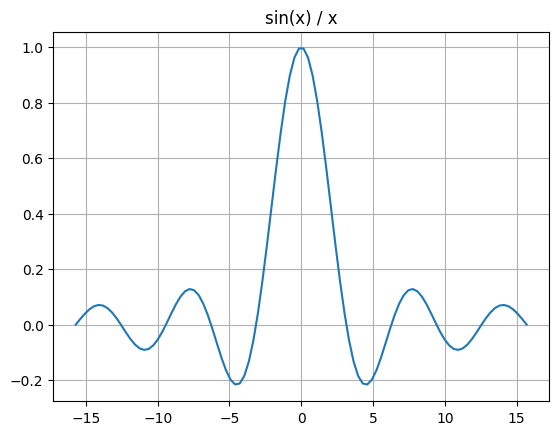

In [14]:
using PyPlot

x = range(-5π, 5π, length=100)
plt.plot(x, sin.(x) ./ x) # we'll discuss this syntax in the next section
plt.title("sin(x) / x")
plt.grid("True")
plt.show()

That said, Julia has its own plotting libraries, such as the `Plots` library, which you may want to check out.

As you can see, Julia's `range()` function acts much like NumPy's `linspace()` function, when you use the `length` argument. However, it acts like Python's `range()` function when you use the `step` argument instead (except the upper bound is inclusive). Julia's `range()` function returns an object which behaves just like an array, except it doesn't actually use any RAM for its elements, it just stores the range parameters. If you want to collect all of the elements into an array, use the `collect()` function (similar to Python's `list()` function):

In [15]:
println(collect(range(10, 80, step=20)))
println(collect(10:20:80)) # 10:20:80 is equivalent to the previous range
println(collect(range(10, 80, length=5))) # similar to NumPy's linspace()
step = (80-10)/(5-1) # 17.5
println(collect(10:step:80)) # equivalent to the previous range

[10, 30, 50, 70]
[10, 30, 50, 70]
[10.0, 27.5, 45.0, 62.5, 80.0]
[10.0, 27.5, 45.0, 62.5, 80.0]


The equivalent Python code is:

```python
# PYTHON
print(list(range(10, 80+1, 20)))
# there's no short-hand for range() in Python
print(np.linspace(10, 80, 5))
step = (80-10)/(5-1) # 17.5
print([i*step + 10 for i in range(5)])
```

|Julia|Python
|-----|------
|`np = pyimport("numpy")` | `import numpy as np`
|`using PyPlot` | `from pylab import *`
|`1:10` | `range(1, 11)`
|`1:2:10`<br />or<br />`range(1, 11, 2)` | `range(1, 11, 2)`
|`1.2:0.5:10.3`<br />or<br />`range(1.2, 10.3, step=0.5)` | `np.arange(1.2, 10.3, 0.5)`
|`range(1, 10, length=3)` | `np.linspace(1, 10, 3)`
|`collect(1:5)`<br />or<br />`[i for i in 1:5]` | `list(range(1, 6))`<br />or<br />`[i for i in range(1, 6)]`



## Loop Fusion
Did you notice that we wrote `sin.(x) ./ x` (not `sin(x) / x`)? This is equivalent to `[sin(i) / i for i in x]`.

In [16]:
a = sin.(x) ./ x
b = [sin(i) / i for i in x]
@assert a == b

 This is not just syntactic sugar: it's actually a very powerful Julia feature. Indeed, notice that the array only gets traversed once. Even if we chained more than two dotted operations, the array would still only get traversed once. This is called _loop fusion_.

In contrast, when using NumPy arrays, `sin(x) / x` first computes a temporary array containing `sin(x)` and then it computes the final array. Two loops and two arrays instead of one. NumPy is implemented in C, and has been heavily optimized, but if you chain many operations, it still ends up being slower and using more RAM than Julia.

However, all the extra dots can sometimes make the code a bit harder to read. To avoid that, you can write `@.` before an expression: every operation will be "dotted" automatically, like this:

In [17]:
a = @. sin(x) / x
b = sin.(x) ./ x
@assert a == b

**Note**: Julia's `@assert` statement starts with an `@` sign, just like `@.`, which means that they are macros. In Julia, macros are very powerful metaprogramming tools: a macro is evaluated at parse time, and it can inspect the expression that follows it and then transform it, or even replace it. In practice, you will often _use_ macros, but you will rarely _define_ your own. I'll come back to macros later.

## Julia is fast!
Let's compare the Julia and Python implementations of the `estimate_pi()` function:

In [18]:
@time estimate_pi(100_000_000);

  0.140922 seconds


To get a more precise benchmark, it's preferable to use the `BenchmarkTools` module. Just like Python's `timeit` module, it provides tools to benchmark code by running it multiple times. This provides a better estimate of how long each call takes:

In [19]:
using BenchmarkTools

@benchmark estimate_pi(100_000_000)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     133.074 ms (0.00% GC)
  median time:      137.283 ms (0.00% GC)
  mean time:        137.457 ms (0.00% GC)
  maximum time:     145.218 ms (0.00% GC)
  --------------
  samples:          37
  evals/sample:     1

If this output is too verbose for you, simply use `@btime` instead:

In [20]:
@btime estimate_pi(100_000_000)

  132.646 ms (0 allocations: 0 bytes)


3.141592663589326

Now let's time the Python version. Since the call is so slow, we just run it once (it will take about 15 seconds):

In [21]:
py"""
from timeit import timeit

duration = timeit("estimate_pi(100_000_000)", number=1, globals=globals())
"""

py"duration"

14.16427015499994

It looks like Julia is close to 100 times faster than Python in this case! To be fair, `PyCall` does add some overhead, but even if you run this code in a separate Python shell, you will see that Julia crushes (pure) Python when it comes to speed.

So why is Julia so much faster than Python? Well, **Julia compiles the code on the fly as it runs it**.

Okay, let's summarize what we learned so far: Julia is a dynamic language that looks and feels a lot like Python, you can even execute Python code super easily, and pure Julia code runs much faster than pure Python code, because it is compiled on the fly. I hope this convinces you to read on!

Next, let's continue to see how Python's main constructs can be implemented in Julia.

# Numbers

In [22]:
i = 42 # 64-bit integer
f = 3.14 # 64-bit float
c = 3.4 + 4.5im # 128-bit complex number

bi = BigInt(2)^1000 # arbitrarily long integer
bf = BigFloat(1) / 7 # arbitrary precision

r = 15//6 * 9//20 # rational number

9//8

And the equivalent Python code:

```python
# PYTHON
i = 42
f = 3.14
c = 3.4 + 4.5j

bi = 2**1000 # integers are seemlessly promoted to long integers
from decimal import Decimal
bf = Decimal(1) / 7

from fractions import Fraction
r = Fraction(15, 6) * Fraction(9, 20)
```

Dividing integers gives floats, like in Python:

In [23]:
5 / 2

2.5

For integer division, use `÷` or `div()`:

In [24]:
5 ÷ 2

2

In [25]:
div(5, 2)

2

The `%` operator is the remainder, not the modulo like in Python. These differ only for negative numbers:

In [26]:
57 % 10

7

In [27]:
(-57) % 10

-7

|Julia|Python
|-----|------
|`3.4 + 4.5im` | `3.4 + 4.5j`
|`BigInt(2)^1000` | `2**1000`
|`BigFloat(3.14)` | `from decimal import Decimal`<br />`Decimal(3.14)`
|`9//8` | `from fractions import Fraction`<br />`Fraction(9, 8)`
|`5/2 == 2.5` | `5/2 == 2.5`
|`5÷2 == 2`<br />or<br />`div(5, 2)` | `5//2 == 2`
|`57%10 == 7` | `57%10 == 7`
|`(-57)%10 == -7` | `(-57)%10 == 3`


# Strings
Julia strings use double quotes `"` or triple quotes `"""`, but not single quotes `'`:

In [28]:
s = "ångström" # Julia strings are UTF-8 encoded by default
println(s)

ångström


In [29]:
s = "Julia strings
     can span
     several lines\n\n
     and they support the \"usual\" escapes like
     \x41, \u5bb6, and \U0001f60a!"
println(s)

Julia strings
     can span
     several lines


     and they support the "usual" escapes like
     A, 家, and 😊!


Use `repeat()` instead of `*` to repeat a string, and use `*` instead of `+` for concatenation:

In [30]:
s = repeat("tick, ", 10) * "BOOM!"
println(s)

tick, tick, tick, tick, tick, tick, tick, tick, tick, tick, BOOM!


The equivalent Python code is:

```python
# PYTHON
s = "tick, " * 10 + "BOOM!"
print(s)
```

Use `join(a, s)` instead of `s.join(a)`:

In [31]:
s = join([i for i in 1:4], ", ")
println(s)

1, 2, 3, 4


You can also specify a string for the last join:

In [32]:
s = join([i for i in 1:4], ", ", " and ")

"1, 2, 3 and 4"

`split()` works as you might expect:

In [33]:
split("   one    three     four   ")

3-element Array{SubString{String},1}:
 "one"
 "three"
 "four"

In [34]:
split("one,,three,four!", ",")

4-element Array{SubString{String},1}:
 "one"
 ""
 "three"
 "four!"

In [35]:
occursin("sip", "Mississippi")

true

In [36]:
replace("I like coffee", "coffee" => "tea")

"I like tea"

Triple quotes work a bit like in Python, but they also remove indentation and ignore the first line feed:

In [37]:
s = """
       1. the first line feed is ignored if it immediately follows \"""
       2. triple quotes let you use "quotes" easily
       3. indentation is ignored
           - up to left-most character
           - ignoring the first line (the one with \""")
       4. the final line feed it n̲o̲t̲ ignored
       """
println("<start>")
println(s)
println("<end>")

<start>
1. the first line feed is ignored if it immediately follows """
2. triple quotes let you use "quotes" easily
3. indentation is ignored
    - up to left-most character
    - ignoring the first line (the one with """)
4. the final line feed it n̲o̲t̲ ignored

<end>


## String Interpolation
String interpolation uses `$variable` and `$(expression)`:

In [38]:
total = 1 + 2 + 3
s = "1 + 2 + 3 = $total = $(1 + 2 + 3)"
println(s)

1 + 2 + 3 = 6 = 6


This means you must escape the `$` sign:

In [39]:
s = "The car costs \$10,000"
println(s)

The car costs $10,000


## Raw Strings
Raw strings use `raw"..."` instead of `r"..."`:

In [40]:
s = raw"In a raw string, you only need to escape quotes \", but not
        $ or \. There is one exception, however: the backslash \
        must be escaped if it's just before quotes like \\\"."
println(s)

In a raw string, you only need to escape quotes ", but not
        $ or \. There is one exception, however: the backslash \
        must be escaped if it's just before quotes like \".


In [41]:
s = raw"""
   Triple quoted raw strings are possible too: $, \, \t, "
     - They handle indentation and the first line feed like regular
       triple quoted strings.
     - You only need to escape triple quotes like \""", and the
       backslash before quotes like \\".
   """
println(s)

Triple quoted raw strings are possible too: $, \, \t, "
  - They handle indentation and the first line feed like regular
    triple quoted strings.
  - You only need to escape triple quotes like """, and the
    backslash before quotes like \".



## Characters
Single quotes are used for individual Unicode characters:

In [42]:
a = 'å' # Unicode code point (single quotes)

'å': Unicode U+00E5 (category Ll: Letter, lowercase)

To be more precise:
* A Julia "character" represents a single Unicode code point (sometimes called a Unicode scalar).
* Multiple code points may be required to produce a single _grapheme_, i.e., something that readers would recognize as a single character. Such a sequence of code points is called a "Grapheme cluster".

For example, the character `é` can be represented either using the single code point `\u00E9`, or the grapheme cluster `e` + `\u0301`:

In [43]:
s = "café"
println(s, " has ", length(s), " code points")

café has 4 code points


In [44]:
s = "cafe\u0301"
println(s, " has ", length(s), " code points")

café has 5 code points


In [45]:
for c in "cafe\u0301"
    display(c)
end

'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

'f': ASCII/Unicode U+0066 (category Ll: Letter, lowercase)

'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)

'́': Unicode U+0301 (category Mn: Mark, nonspacing)

Julia represents any individual character like `'é'` using 32-bits (4 bytes):

In [46]:
sizeof('é')

4

But strings are represented using the UTF-8 encoding. In this encoding, code points 0 to 127 are represented using one byte, but any code point above 127 is represented using 2 to 6 bytes:

In [47]:
sizeof("a")

1

In [48]:
sizeof("é")

2

In [49]:
sizeof("家")

3

In [50]:
sizeof("🏳️‍🌈") # this is a grapheme with 4 code points of 4 + 3 + 3 + 4 bytes

14

In [51]:
[sizeof(string(c)) for c in "🏳️‍🌈"]

4-element Array{Int64,1}:
 4
 3
 3
 4

You can iterate through graphemes instead of code points:

In [52]:
using Unicode

for g in graphemes("e\u0301🏳️‍🌈")
  println(g)
end

é
🏳️‍🌈


## String Indexing
Characters in a string are indexed based on the position of their starting byte in the UTF-8 representation. For example, the character `ê` in the string `"être"` is located at index 1, but the character `'t'` is located at index 3, since the UTF-8 encoding of `ê` is 2 bytes long:

In [53]:
s = "être"
println(s[1])
println(s[3])
println(s[4])
println(s[5])

ê
t
r
e


If you try to get the character at index 2, you get an exception:



In [54]:
try
    s[2]
catch ex
    ex
end

StringIndexError("être", 2)

By the way, notice the exception-handling syntax (we'll discuss exceptions later):

|Julia|Python
|-----|------
|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`catch ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`except Exception as ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`



You can get a substring easily, using valid character indices:

In [55]:
s[1:3]

"êt"

You can iterate through a string, and it will return all the code points:

In [56]:
for c in s
    println(c)
end

ê
t
r
e


Or you can iterate through the valid character indices:

In [57]:
for i in eachindex(s)
    println(i, ": ", s[i])
end

1: ê
3: t
4: r
5: e


Benefits of representing strings as UTF-8:
* All Unicode characters are supported.
* UTF-8 is fairly compact (at least for Latin scripts).
* It plays nicely with C libraries which expect ASCII characters only, since ASCII characters correspond to the Unicode code points 0 to 127, which UTF-8 encodes exactly like ASCII.

Drawbacks:
* UTF-8 uses a variable number of bytes per character, which makes indexing harder.
  * However, If the language tried to hide this by making `s[5]` search for the 5th character from the start of the string, then code like `for i in 1:length(s); s[i]; end` would be unexpectedly inefficient, since at each iteration there would be a search from the beginning of the string, leading to O(_n_<sup>2</sup>) performance instead of O(_n_).

In [58]:
findfirst(isequal('t'), "être")

3

In [59]:
findlast(isequal('p'), "Mississippi")

10

In [60]:
findnext(isequal('i'), "Mississippi", 2)

2

In [61]:
findnext(isequal('i'), "Mississippi", 2 + 1)

5

In [62]:
findprev(isequal('i'), "Mississippi", 5 - 1)

2

Other useful string functions: `ncodeunits(str)`, `codeunit(str, i)`, `thisind(str, i)`, `nextind(str, i, n=1)`, `prevind(str, i, n=1)`.

## Regular Expressions
To create a regular expression in Julia, use the `r"..."` syntax:

In [63]:
regex = r"c[ao]ff?(?:é|ee)"

r"c[ao]ff?(?:é|ee)"

The expression `r"..."` is equivalent to `Regex("...")` except the former is evaluated at parse time, while the latter is evaluated at runtime, so unless you need to construct a Regex dynamically, you should prefer `r"..."`.

In [64]:
occursin(regex, "A bit more coffee?")

true

In [65]:
m = match(regex, "A bit more coffee?")
m.match

"coffee"

In [66]:
m.offset

12

In [67]:
m = match(regex, "A bit more tea?")
isnothing(m) && println("I suggest coffee instead")

I suggest coffee instead


In [68]:
regex = r"(.*)#(.+)"
line = "f(1) # nice comment"
m = match(regex, line)
code, comment = m.captures
println("code: ", repr(code))
println("comment: ", repr(comment))

code: "f(1) "
comment: " nice comment"


In [69]:
m[2]

" nice comment"

In [70]:
m.offsets

2-element Array{Int64,1}:
 1
 7

In [71]:
m = match(r"(?<code>.+)#(?<comment>.+)", line)
m[:comment]

" nice comment"

In [72]:
replace("Want more bread?", r"(?<verb>more|some)" => s"a little")

"Want a little bread?"

In [73]:
replace("Want more bread?", r"(?<verb>more|less)" => s"\g<verb> and \g<verb>")

"Want more and more bread?"

# Control Flow

## `if` statement

Julia's `if` statement works just like in Python, with a few differences:

* Julia uses `elseif` instead of Python's `elif`.
* Julia's logic operators are just like in C-like languages: `&&` means `and`, `||` means `or`, `!` means `not`, and so on.

In [74]:
a = 1
if a == 1
    println("One")
elseif a == 2
    println("Two")
else
    println("Other")
end

One


Julia also has `⊻` for exclusive or (you can type `\xor<tab>` to get the ⊻ character):

In [75]:
@assert false ⊻ false == false
@assert false ⊻ true == true
@assert true ⊻ false == true
@assert true ⊻ true == false

Oh, and notice that `true` and `false` are all lowercase, unlike Python's `True` and `False`.

Since `&&` is lazy (like `and` in Python), `cond && f()` is a common shorthand for `if cond; f(); end`. Think of it as "_cond then f()_":

In [76]:
a = 2
a == 1 && println("One")
a == 2 && println("Two")

Two


Similarly, `cond || f()` is a common shorthand for `if !cond; f(); end`. Think of it as "_cond else f()_":

In [77]:
a = 1
a == 1 || println("Not one")
a == 2 || println("Not two")

Not two


All expressions return a value in Julia, including `if` statements. For example:

In [78]:
a = 1
result = if a == 1
             "one"
         else
             "two"
         end
result

"one"

When an expression cannot return anything, it returns `nothing`:

In [79]:
a = 1
result = if a == 2
            "two"
          end

isnothing(result)

true

`nothing` is the single instance of the type `Nothing`:

In [80]:
typeof(nothing)

Nothing

## `for` loops
You can use `for` loops just like in Python, as we saw earlier. However, it's also possible to create nested loops on a single line:

In [81]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)
(2, 1, 2)
(2, 2, 1)
(2, 2, 2)
(2, 3, 1)
(2, 3, 2)


The corresponding Python code would look like this:

```python
# PYTHON
from itertools import product

for a, b, c in product(range(1, 3), range(1, 4), range(1, 3)):
    print((a, b, c))
```

The `continue` and `break` keywords work just like in Python. Note that in single-line nested loops, `break` will exit all loops, not just the inner loop:

In [82]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
    (a, b, c) == (2, 1, 1) && break
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)


Julia does not support the equivalent of Python's `for`/`else` construct. You need to write something like this:

In [83]:
found = false
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"] # try removing "Wally"
    println("Looking at $person")
    person == "Wally" && (found = true; break)
end
found || println("I did not find Wally.")

Looking at Joe
Looking at Jane
Looking at Wally


true

The equivalent Python code looks like this:

```python
# PYTHON
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"]: # try removing "Wally"
    print(f"Looking at {person}")
    if person == "Wally":
        break
else:
    print("I did not find Wally.")
```



|Julia|Python
|-----|------
|`if cond1`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elseif cond2`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`end` |`if cond1:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elif cond2:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`&&` | `and`
|`\|\|` | `or`
|`!` | `not`
|`⊻` (type `\xor<tab>`) | `^`
|`true` | `True`
|`false` | `False`
|`cond && f()` | `if cond: f()`
|`cond \|\| f()` | `if not cond: f()`
|`for i in 1:5 ... end` | `for i in range(1, 6): ...`
|`for i in 1:5, j in 1:6 ... end` | `from itertools import product`<br />`for i, j in product(range(1, 6), range(1, 7)):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`while cond ... end` | `while cond: ...`
|`continue` | `continue`
|`break` | `break`


Now lets looks at data structures, starting with tuples.

# Tuples

 Julia has tuples, very much like Python. They can contain anything:

In [84]:
t = (1, "Two", 3, 4, 5)

(1, "Two", 3, 4, 5)

Let's look at one element:

In [85]:
t[1]

1

Hey! Did you see that? **Julia is 1-indexed**, like Matlab and other math-oriented programming languages, not 0-indexed like Python and most programming languages. I found it easy to get used to, and in fact I quite like it, but your mileage may vary.

Moreover, the indexing bounds are inclusive. In Python, to get the 1st and 2nd elements of a list or tuple, you would write `t[0:2]` (or just `t[:2]`), while in Julia you write `t[1:2]`.


In [86]:
t[1:2]

(1, "Two")

Note that `end` represents the index of the last element in the tuple. So you must write `t[end]` instead of `t[-1]`. Similarly, you must write `t[end - 1]`, not `t[-2]`, and so on.

In [87]:
t[end]

5

In [88]:
t[end - 1:end]

(4, 5)

Like in Python, tuples are immutable:

In [89]:
try
  t[2] = 2
catch ex
  ex
end

MethodError(setindex!, ((1, "Two", 3, 4, 5), 2, 2), 0x0000000000006a24)

The syntax for empty and 1-element tuples is the same as in Python:

In [90]:
empty_tuple = ()
one_element_tuple = (42,)

(42,)

You can unpack a tuple, just like in Python (it's called "destructuring" in Julia):

In [91]:
a, b, c, d, e = (1, "Two", 3, 4, 5)
println("a=$a, b=$b, c=$c, d=$d, e=$e")

a=1, b=Two, c=3, d=4, e=5


It also works with nested tuples, just like in Python:

In [92]:
(a, (b, c), (d, e)) = (1, ("Two", 3), (4, 5))
println("a=$a, b=$b, c=$c, d=$d, e=$e")

a=1, b=Two, c=3, d=4, e=5


However, consider this example:

In [93]:
a, b, c = (1, "Two", 3, 4, 5)
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=3


In Python, this would cause a `ValueError: too many values to unpack`. In Julia, the extra values in the tuple are just ignored.

If you want to capture the extra values in the variable `c`, you need to do so explicitly:

In [94]:
t = (1, "Two", 3, 4, 5)
a, b = t[1:2]
c = t[3:end]
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=(3, 4, 5)


Or more concisely:

In [95]:
(a, b), c = t[1:2], t[3:end]
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=(3, 4, 5)


The corresponding Python code is:

```python
# PYTHON
t = (1, "Two", 3, 4, 5)
a, b, *c = t
print(f"a={a}, b={b}, c={c}")
```

## Named Tuples

Julia supports named tuples:

In [96]:
nt = (name="Julia", category="Language", stars=5)

(name = "Julia", category = "Language", stars = 5)

In [97]:
nt.name

"Julia"

In [98]:
dump(nt)

NamedTuple{(:name, :category, :stars),Tuple{String,String,Int64}}
  name: String "Julia"
  category: String "Language"
  stars: Int64 5


The corresponding Python code is:

```python
# PYTHON
from collections import namedtuple

Rating = namedtuple("Rating", ["name", "category", "stars"])
nt = Rating(name="Julia", category="Language", stars=5)
print(nt.name) # prints: Julia
print(nt) # prints: Rating(name='Julia', category='Language', stars=5)
```

# Structs
Julia supports structs, which hold multiple named fields, a bit like named tuples:

In [99]:
struct Person
    name
    age
end

Structs have a default constructor, which expects all the field values, in order:

In [100]:
p = Person("Mary", 30)

Person("Mary", 30)

In [101]:
p.age

30

You can create other constructors by creating functions with the same name as the struct:

In [102]:
function Person(name)
    Person(name, -1)
end

function Person()
    Person("no name")
end

p = Person()

Person("no name", -1)

This creates two constructors: the second calls the first, which calls the default constructor. Notice that you can create multiple functions with the same name but different arguments. We will discuss this later.

These two constructors are called "outer constructors", since they are defined outside of the definition of the struct. You can also define "inner constructors":

In [103]:
struct Person2
    name
    age
    function Person2(name)
        new(name, -1)
    end
end

function Person2()
    Person2("no name")
end

p = Person2()

Person2("no name", -1)

This time, the outer constructor calls the inner constructor, which calls the `new()` function. This `new()` function only works in inner constructors, and of course it creates an instance of the struct.

When you define inner constructors, they replace the default constructor: 

In [104]:
try
    Person2("Bob", 40)
catch ex
    ex
end

MethodError(Person2, ("Bob", 40), 0x0000000000006a29)

Structs usually have very few inner constructors (often just one), which do the heavy duty work, and the checks. Then they may have multiple outer constructors which are mostly there for convenience.

By default, structs are immutable:

In [105]:
try
    p.name = "Someone"
catch ex
    ex
end

ErrorException("setfield! immutable struct of type Person2 cannot be changed")

However, it is possible to define a mutable struct:

In [106]:
mutable struct Person3
    name
    age
end

p = Person3("Lucy", 79)
p.age += 1
p

Person3("Lucy", 80)

Structs look a lot like Python classes, with instance variables and constructors, but where are the methods? We will discuss this later, in the "Methods" section.

# Arrays

Let's create a small array:

In [107]:
a = [1, 4, 9, 16]

4-element Array{Int64,1}:
  1
  4
  9
 16

Indexing and assignments work as you would expect:

In [108]:
a[1] = 10
a[2:3] = [20, 30]
a

4-element Array{Int64,1}:
 10
 20
 30
 16

## Element Type
Since we used only integers when creating the array, Julia inferred that the array is only meant to hold integers (NumPy arrays behave the same way). Let's try adding a string:

In [109]:
try
  a[3] = "Three"
catch ex
  ex
end

MethodError(convert, (Int64, "Three"), 0x0000000000006a2a)

Nope! We get a `MethodError` exception, telling us that Julia could not convert the string `"Three"` to a 64-bit integer (we will discuss exceptions later). If we want an array that can hold any type, like Python's lists can, we must prefix the array with `Any`, which is Julia's root type (like `object` in Python):

In [110]:
a = Any[1, 4, 9, 16]
a[3] = "Three"
a

4-element Array{Any,1}:
  1
  4
   "Three"
 16

Prefixing with `Float64`, or `String` or any other type works as well:

In [111]:
Float64[1, 4, 9, 16]

4-element Array{Float64,1}:
  1.0
  4.0
  9.0
 16.0

An empty array is automatically an `Any` array:

In [112]:
a = []

0-element Array{Any,1}

You can use the `eltype()` function to get an array's element type (the equivalent of NumPy arrays' `dtype`):

In [113]:
eltype([1, 4, 9, 16])

Int64

If you create an array containing objects of different types, Julia will do its best to use a type that can hold all the values as precisely as possible. For example, a mix of integers and floats results in a float array:

In [114]:
[1, 2, 3.0, 4.0]

4-element Array{Float64,1}:
 1.0
 2.0
 3.0
 4.0

This is similar to NumPy's behavior:

```python
# PYTHON
np.array([1, 2, 3.0, 4.0]) # => array([1., 2., 3., 4.])
```

A mix of unrelated types results in an `Any` array:

In [115]:
[1, 2, "Three", 4]

4-element Array{Any,1}:
 1
 2
  "Three"
 4

If you want to live in a world without type constraints, you can prefix all you arrays with `Any`, and you will feel like you're coding in Python. But I don't recommend it: the compiler can perform a bunch of optimizations when it knows exactly the type and size of the data the program will handle, so it will run much faster. So when you create an empty array but you know the type of the values it will contain, you might as well prefix it with that type (you don't have to, but it will speed up your program).

## Push and Pop
To append elements to an array, use the `push!()` function. By convention, functions whose name ends with a bang `!` may modify their arguments:

In [116]:
a = [1]
push!(a, 4)
push!(a, 9, 16)

4-element Array{Int64,1}:
  1
  4
  9
 16

This is similar to the following Python code:

```python
# PYTHON
a = [1]
a.append(4)
a.extend([9, 16]) # or simply a += [9, 16]
```

And `pop!()` works like in Python:

In [117]:
pop!(a)

16

Equivalent to:

```python
# PYTHON
a.pop()
```

There are many more functions you can call on an array. We will see later how to find them.

## Multidimensional Arrays
Importantly, Julia arrays can be multidimensional, just like NumPy arrays:

In [118]:
M = [1   2   3   4
     5   6   7   8
     9  10  11  12]

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

Another syntax for this is:

In [119]:
M = [1 2 3 4; 5 6 7 8; 9 10 11 12]

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

You can index them much like NumPy arrays:

In [120]:
M[2:3, 3:4]

2×2 Array{Int64,2}:
  7   8
 11  12

You can transpose a matrix using the "adjoint" operator `'`:

In [121]:
M'

4×3 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 1  5   9
 2  6  10
 3  7  11
 4  8  12

As you can see, Julia arrays are closer to NumPy arrays than to Python lists.


Arrays can be concatenated vertically using the `vcat()` function:

In [122]:
M1 = [1 2
      3 4]
M2 = [5 6
      7 8]
vcat(M1, M2)

4×2 Array{Int64,2}:
 1  2
 3  4
 5  6
 7  8

Alternatively, you can use the `[M1; M2]` syntax:

In [123]:
[M1; M2]

4×2 Array{Int64,2}:
 1  2
 3  4
 5  6
 7  8

To concatenate arrays horizontally, use `hcat()`:

In [124]:
hcat(M1, M2)

2×4 Array{Int64,2}:
 1  2  5  6
 3  4  7  8

Or you can use the `[M1 M2]` syntax:

In [125]:
[M1 M2]

2×4 Array{Int64,2}:
 1  2  5  6
 3  4  7  8

You can combine horizontal and vertical concatenation:

In [126]:
M3 = [9 10 11 12]
[M1 M2; M3]

3×4 Array{Int64,2}:
 1   2   5   6
 3   4   7   8
 9  10  11  12

Equivalently, you can call the `hvcat()` function. The first argument specifies the number of arguments to concatenate in each block row:

In [127]:
hvcat((2, 1), M1, M2, M3)

3×4 Array{Int64,2}:
 1   2   5   6
 3   4   7   8
 9  10  11  12

`hvcat()` is useful to create a single cell matrix:

In [128]:
hvcat(1, 42)

1×1 Array{Int64,2}:
 42

 Or a column vector (i.e., an _n_×1 matrix = a matrix with a single column):

In [129]:
hvcat((1, 1, 1), 10, 11, 12) # a column vector with values 10, 11, 12
hvcat(1, 10, 11, 12) # equivalent to the previous line

3×1 Array{Int64,2}:
 10
 11
 12

Alternatively, you can transpose a row vector (but `hvcat()` is a bit faster):

In [130]:
[10 11 12]'

3×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 10
 11
 12

The REPL and IJulia call `display()` to print the result of the last expression in a cell (except when it is `nothing`). It is fairly verbose:

In [131]:
display([1, 2, 3, 4])

4-element Array{Int64,1}:
 1
 2
 3
 4

The `println()` function is more concise, but be careful not to confuse vectors, column vectors and row vectors (printed with commas, semi-colons and spaces, respectively):

In [132]:
println("Vector: ", [1, 2, 3, 4])
println("Column vector: ", hvcat(1, 1, 2, 3, 4))
println("Row vector: ", [1 2 3 4])
println("Matrix: ", [1 2 3; 4 5 6])

Vector: [1, 2, 3, 4]
Column vector: [1; 2; 3; 4]
Row vector: [1 2 3 4]
Matrix: [1 2 3; 4 5 6]


Although column vectors are printed as `[1; 2; 3; 4]`, evaluating `[1; 2; 3; 4]` will give you a regular vector. That's because `[x;y]` concatenates `x` and `y` vertically, and if `x` and `y` are scalars or vectors, you just get a regular vector.

|Julia|Python
|-----|------
|`a = [1, 2, 3]` | `a = [1, 2, 3]`<br />or<br />`import numpy as np`<br />`np.array([1, 2, 3])`
|`a[1]` | `a[0]`
|`a[end]` | `a[-1]`
|`a[2:end-1]` | `a[1:-1]`
|`push!(a, 5)` | `a.append(5)`
|`pop!(a)` | `a.pop()`
|`M = [1 2 3]` | `np.array([[1, 2, 3]])`
|`M = [1 2 3]'` | `np.array([[1, 2, 3]]).T`
|`M = hvcat(1,  1, 2, 3)` | `np.array([[1], [2], [3]])`
|`M = [1 2 3`<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;`4 5 6]`<br />or<br />`M = [1 2 3; 4 5 6]` | `M = np.array([[1,2,3], [4,5,6]])`
|`M[1:2, 2:3]` | `M[0:2, 1:3]`
|`[M1; M2]` | `np.r_[M1, M2]`
|`[M1  M2]` | `np.c_[M1, M2]`
|`[M1 M2; M3]` | `np.r_[np.c_[M1, M2], M3]`
